In [21]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import gridspec
mpl.style.use('/Users/nik/Dropbox/Notebooks/talksrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [22]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

### SCF72

In [23]:
data_dir = '/Volumes/JUPITER/Data/SCF72/4K/'

In [4]:
f = os.path.join(data_dir, 'VI-gate_17-19_13_f.bin')
print os.path.isfile(f)

True


In [5]:
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

In [6]:
cond = get_dIdV(df, 50e-6)

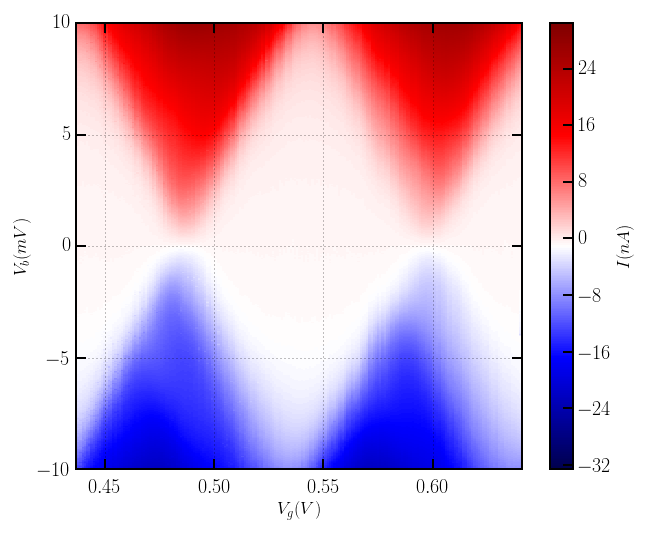

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
ax.set_xlim(0.437,0.641)
ax.grid()
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

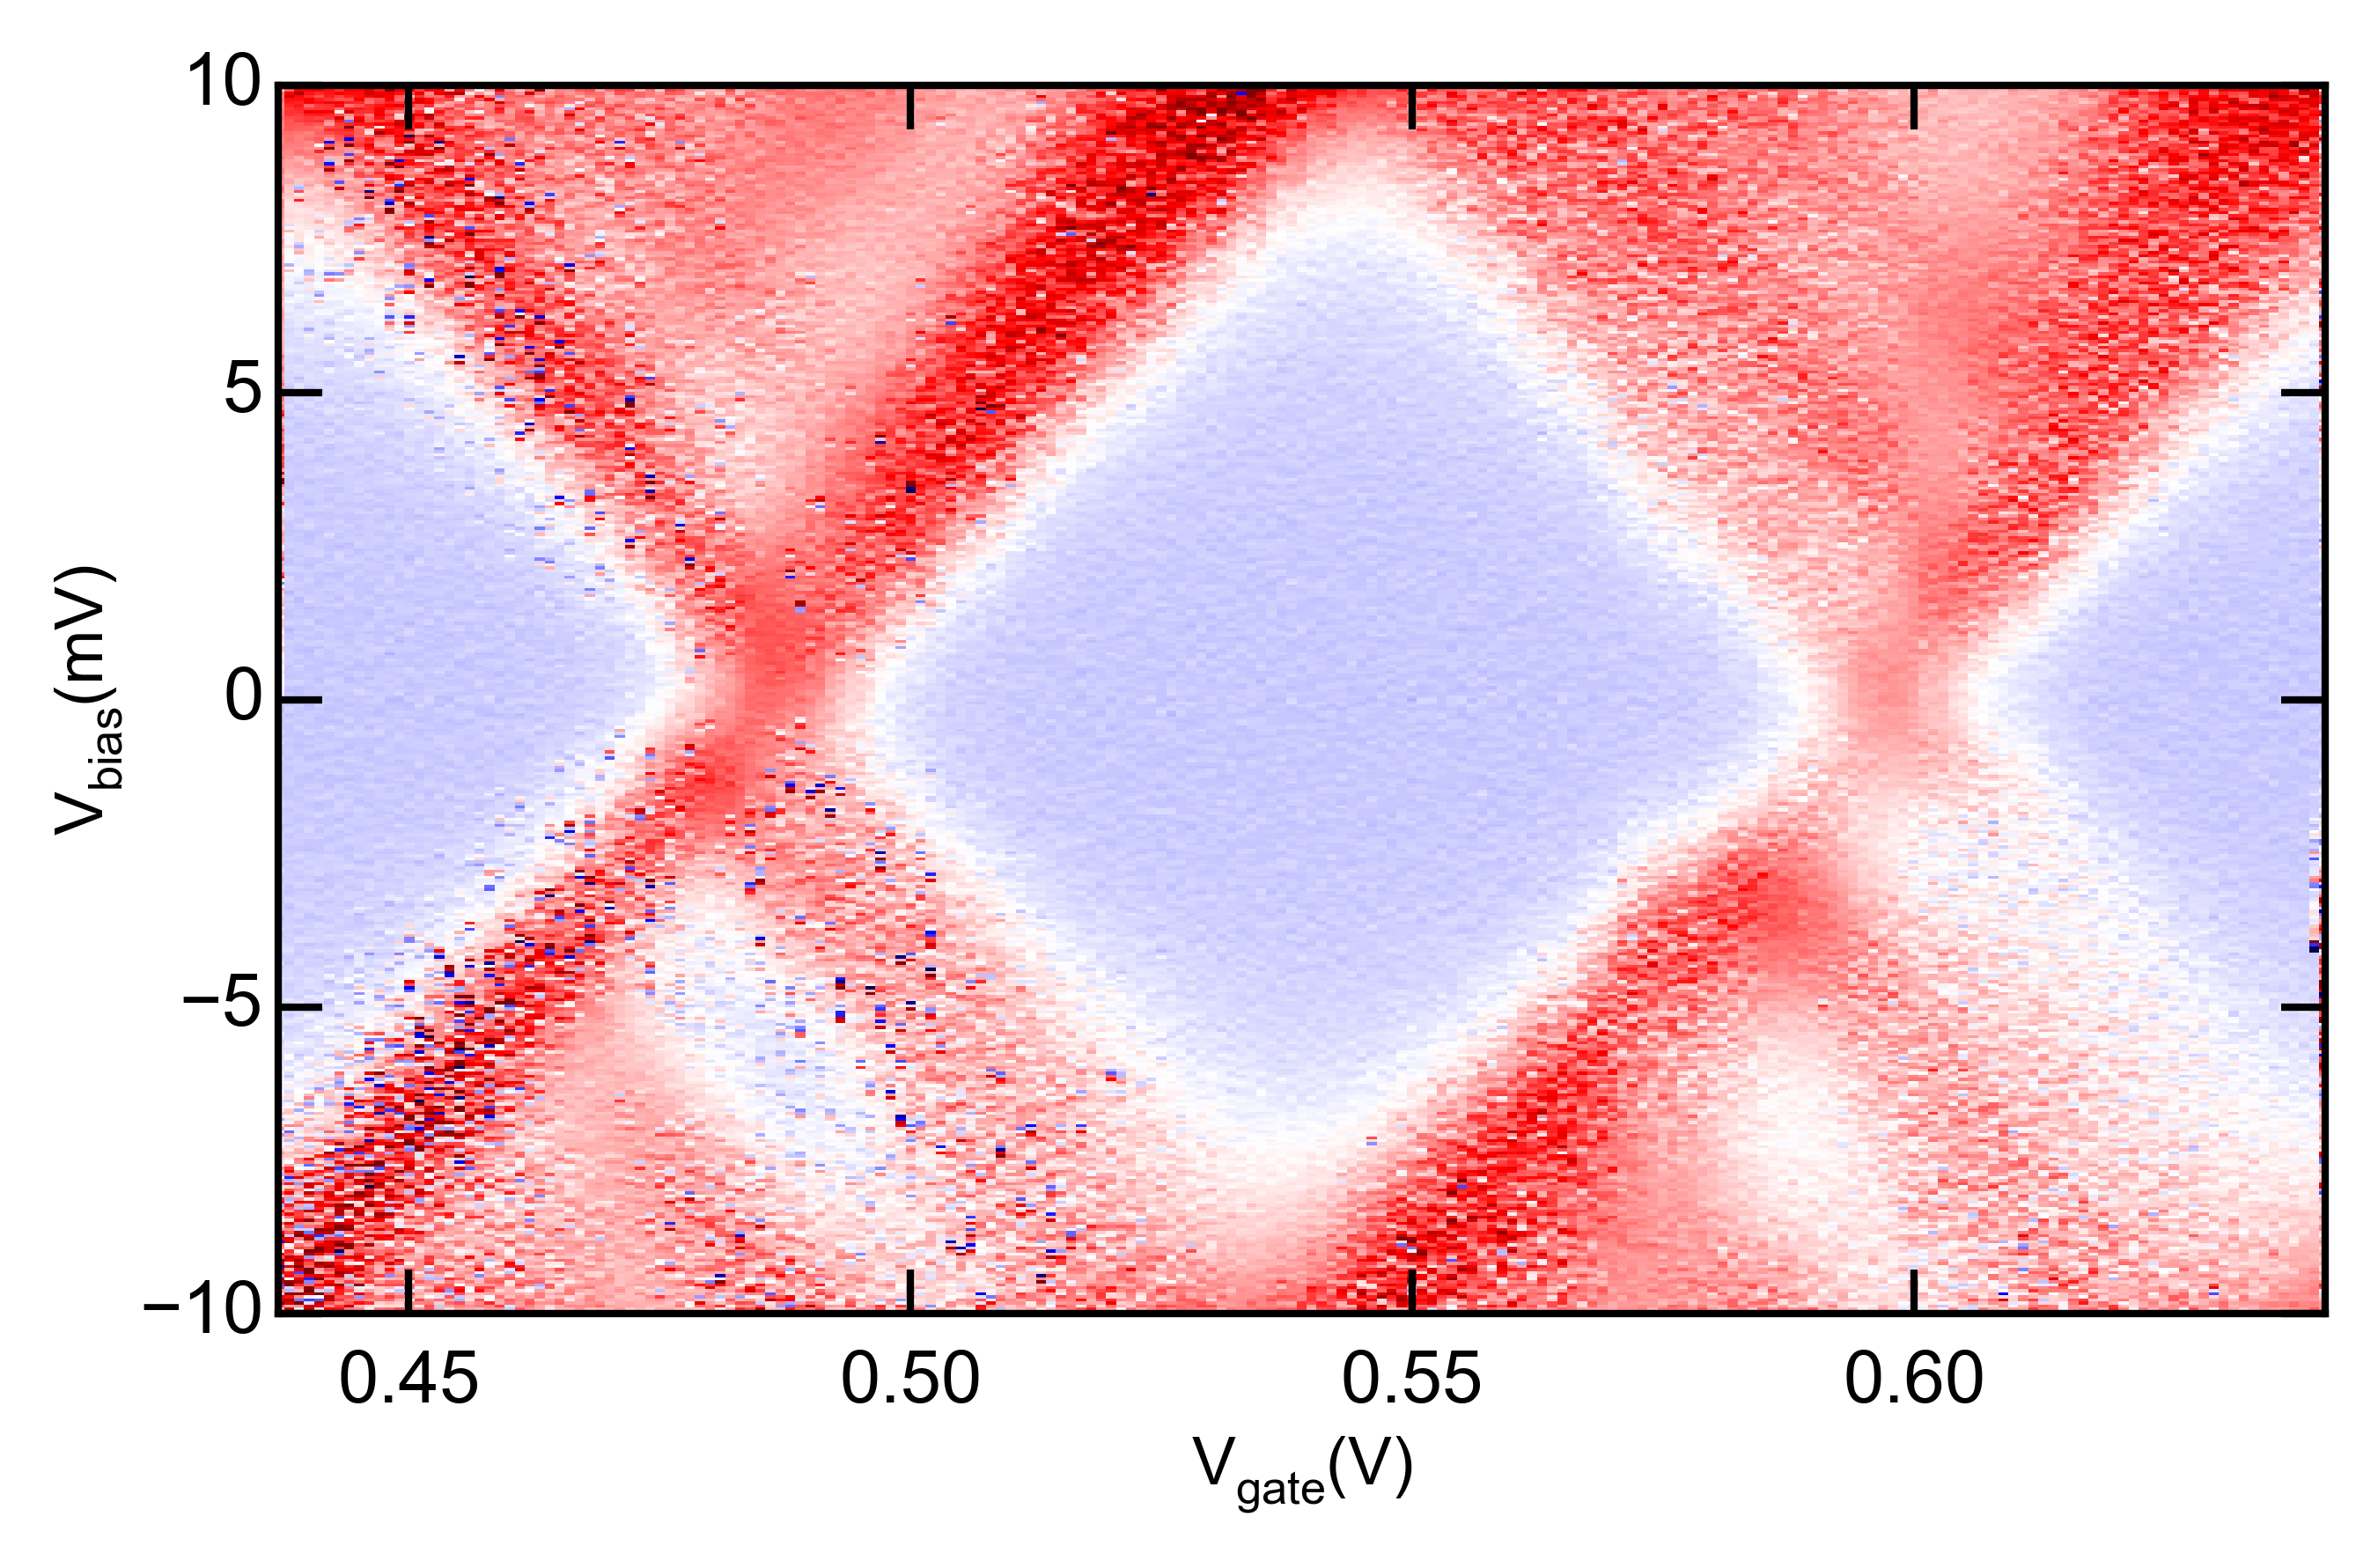

In [20]:
# NICE DIAMOND PLOT FOR GENERAL QD DISCUSSION

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond/3.875e-5, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.25, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_{gate} (V)$')
ax.set_ylabel(r'$V_{bias} (mV)$')
#ax.grid()
ax.set_xlim(0.437,0.641)
# ax.set_title('B=0T')
# cb = plt.colorbar(im)
# cb.set_label(r'$G (\frac{e^2}{h})$', fontsize = 22)
fig.savefig('/Users/nik/Dropbox/Talks/DEFENSE/figures/diamond_example.png')

In [8]:
icut = df.iloc[:,562:568].mean(axis = 1)
ccut = cond.iloc[:,562:568].mean(axis = 1)

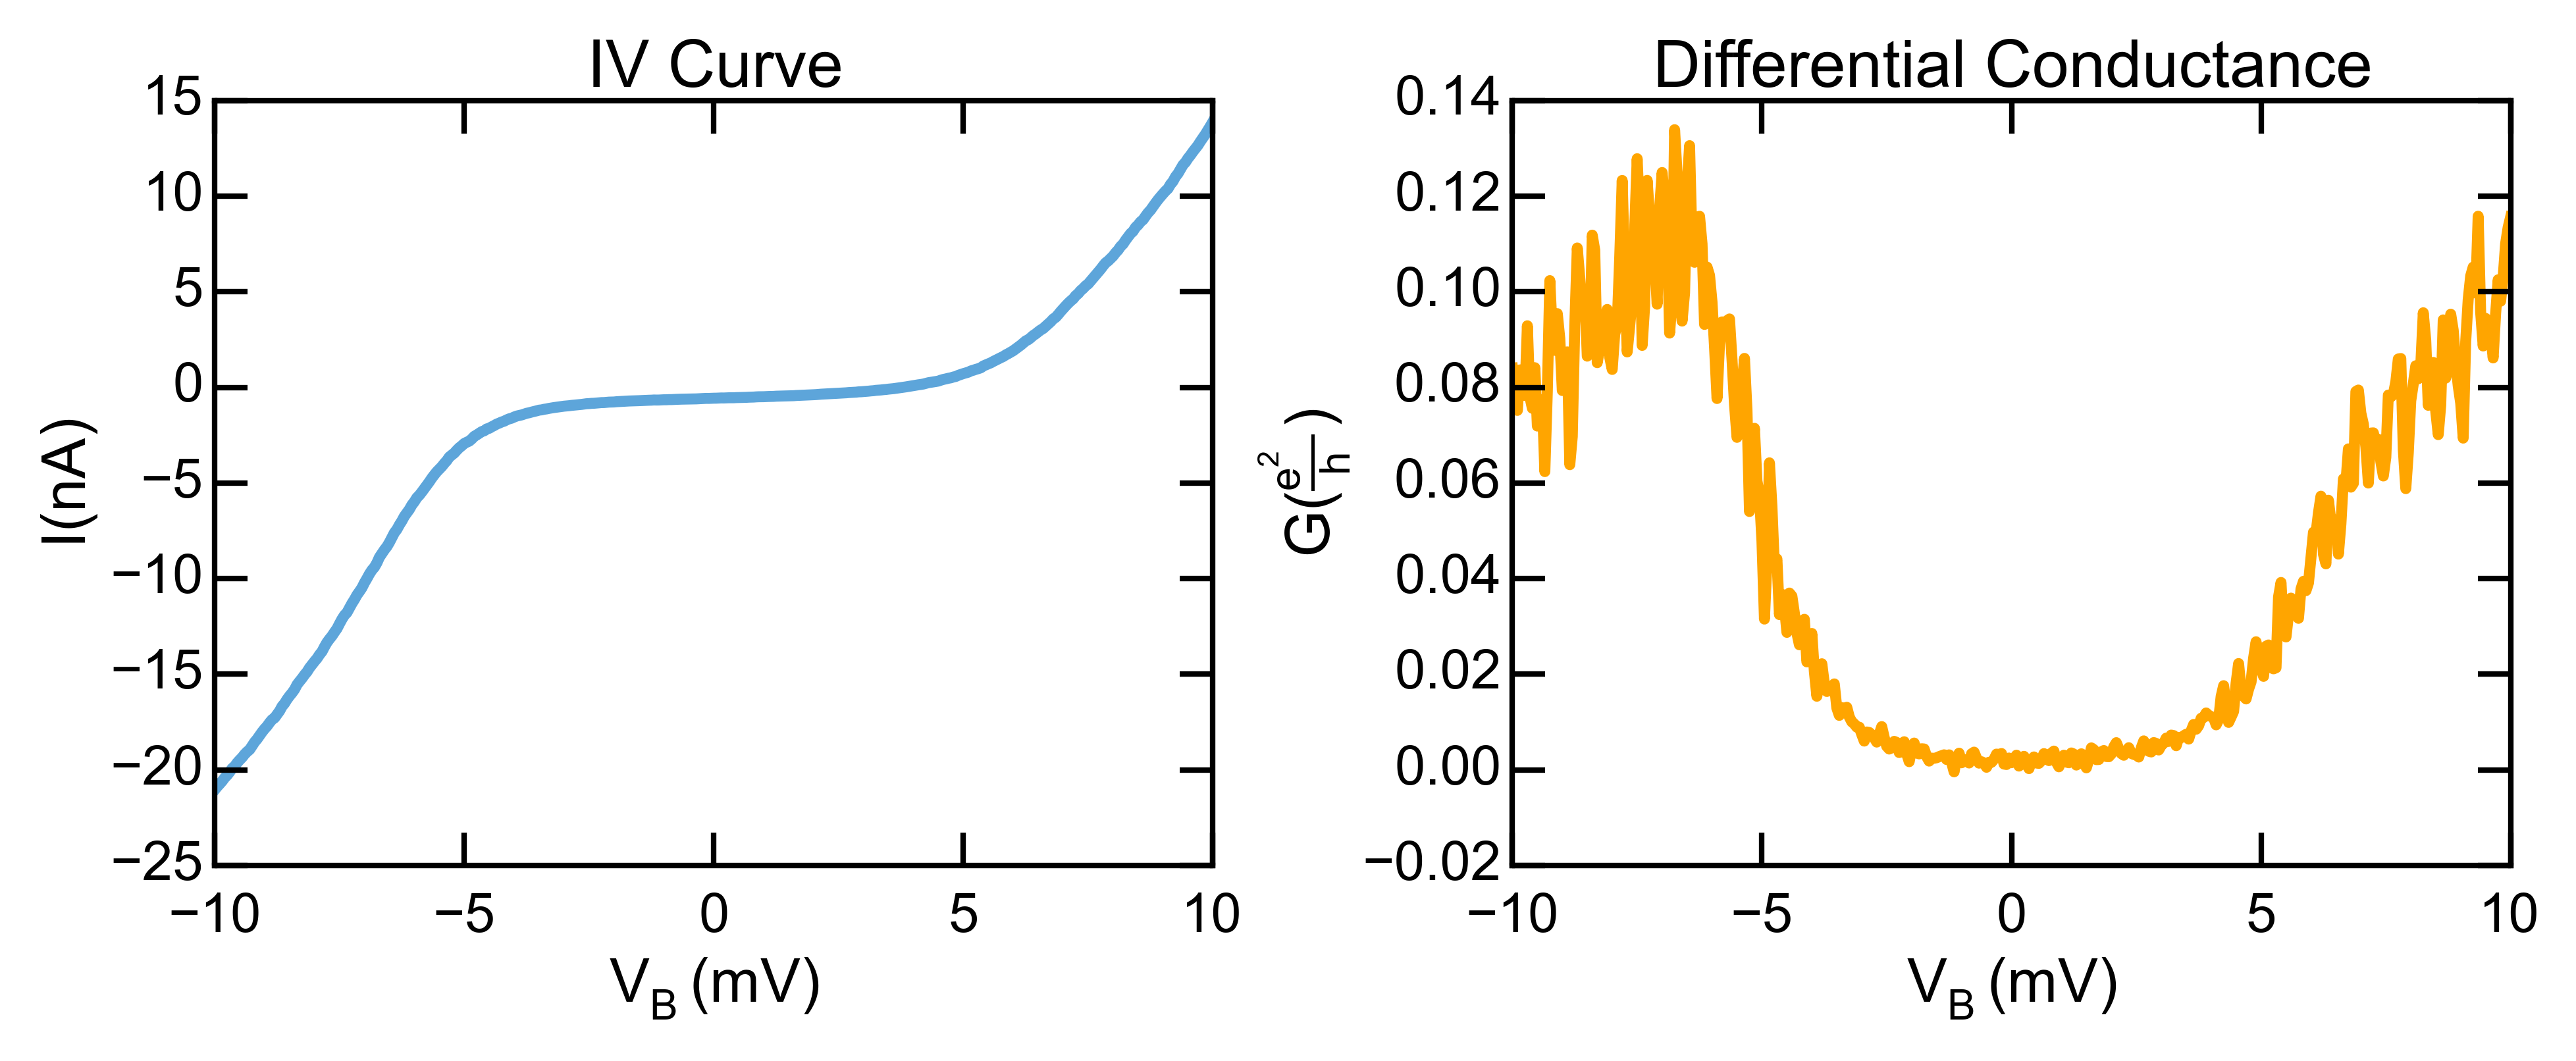

In [16]:
# CUTS FOR IV AND DIFFERENTIAL CONDUCTANCE

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.plot(df.index.values, icut*1e9)
ax1.set_xlabel(r'$V_B (mV)$', fontsize = 22)
ax1.set_ylabel(r'$I (nA)$', fontsize = 22)
ax1.set_title('IV Curve', fontsize = 24)

ax2.plot(df.index.values, ccut/3.875e-5, color = 'orange')
ax2.set_xlabel(r'$V_B (mV)$', fontsize = 22)
ax2.set_ylabel(r'$G (\frac{e^2}{h})$', fontsize = 22)
ax2.set_title('Differential Conductance', fontsize=24)

fig.subplots_adjust(wspace=.3)
fig.savefig('/Users/nik/Dropbox/Talks/DEFENSE/figures/bias_sweep.png')

In [56]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF72/'
os.listdir(data_dir)

['4K_BI_17-19_13_c_5mV_0mV.pkl',
 '4K_BI_17-19_13_d_5mV_0mV.pkl',
 '4K_BI_17-19_13_e_5mV_0mV.pkl',
 '4K_BI_17-19_13_i_10mV_0mV.pkl',
 '4K_gate-swp_17-29_13_b1.pk2',
 '4K_gate-swp_17-29_13_b1.pkl',
 '4K_VI-gate_17-19_13_f.pkl',
 '4K_VI-gate_17-19_13_g.pkl',
 '4K_VI-gate_17-19_13_g_n4T.pkl',
 '4K_VI-gate_23-21_13_f.pkl',
 'RT_gate-swp_15-23_13_a.pkl',
 '4K_VI-gate_17-19_13_g_cond.pkl',
 '4K_VI-gate_17-19_13_g_noise-amp.pkl',
 '4K_VI-gate_17-19_13_g_n4T_cond.pkl',
 '4K_VI-gate_17-19_13_g_n4T_noise-amp.pkl',
 'figures']

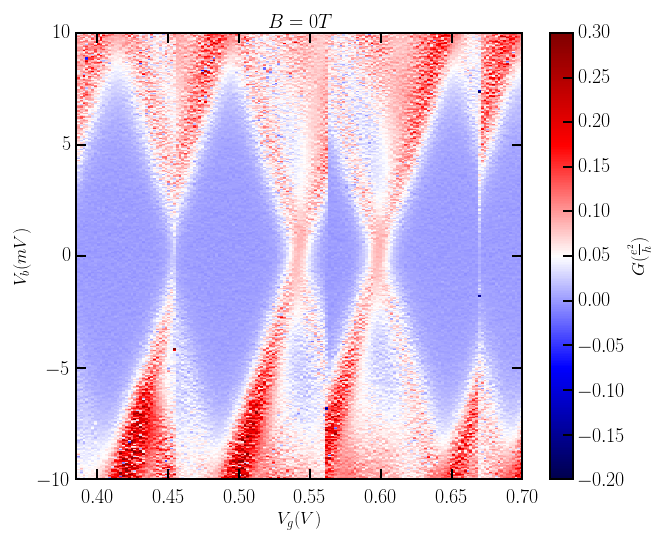

In [57]:
# DIAMONDS AT 0 FIELD

f = os.path.join(data_dir, '4K_VI-gate_17-19_13_g.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1)
cond = get_dIdV(df, 50e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(0.385,0.7)
ax.set_title('$B = 0T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

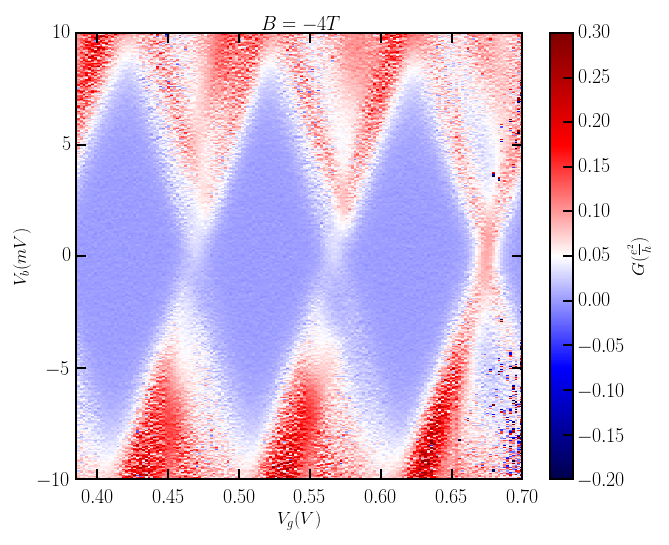

In [58]:
# DIAMONDS AT -4T

f = os.path.join(data_dir, '4K_VI-gate_17-19_13_g_n4T.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1)
cond = get_dIdV(df, 50e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(0.385,0.7)
ax.set_title('$B = -4T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

### SCF96

In [6]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'
os.listdir(data_dir)

['4K_gate-i_9-12_23_a_1.0mV.pkl',
 '4K_gate-i_9-12_23_b_1.0mV.pkl',
 '4K_gate-i_9-12_23_e_2.0mV.pkl',
 '4K_vi-gate_9-12_23_f.pkl',
 '4K_vi-gate_9-12_23_f_2T.pkl',
 '4K_bi_9-12_23_a_25mV_5500mV.pkl',
 '4K_bi_9-12_23_c_10mV_5500mV.pkl',
 '4K_bi_9-12_23_d_25mV_7000mV.pkl',
 '4K_gate-i_18-20_23_b_2.0mV.pkl',
 '4K_gate-i_15-16_23_a_2.0mV.pkl',
 '4K_gate-i_13-18_23_a_2.0mV.pkl',
 '4K_gate-i_16-17_23_b_2.0mV.pkl',
 '4K_vi-gate_16-17_23_a.pkl',
 '4K_vi-gate_16-17_23_a_2T.pkl',
 '4K_vi-bswp_16-17_23_c_10000.0mV.pkl',
 '4K_bi_16-17_23_multiple-runs_b_10mV_15000mV.pkl',
 '4K_bi_16-17_23_multiple-runs_c_-20mV_7000mV.pkl',
 '4K_bi_16-17_23_multiple-runs_f_25mV_6000mV.pkl',
 '4K_vi-bswp_16-17_23_c_cond.pkl',
 '4K_vi-bswp_16-17_23_c_noise-amp.pkl',
 'figures',
 '4K_vi-gate_9-12_23_f_2T_cond.pkl',
 '4K_vi-gate_9-12_23_f_2T_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_cond.pkl',
 '4K_vi-gate_16-17_23_a_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl',
 '4K_vi-gate_16-17_23_a_2T_cond.pkl',
 '4K_vi-b

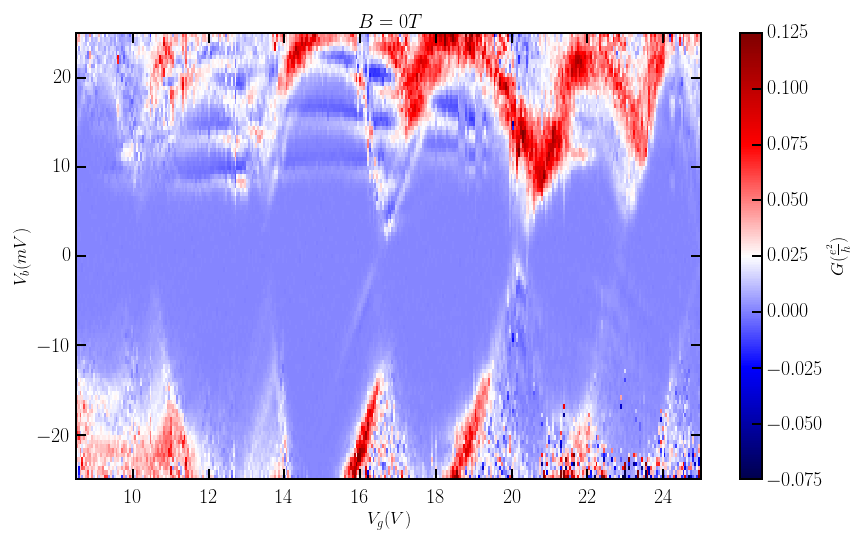

In [60]:
# DIAMONDS AT 0T

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1, figsize = (14,8))
cond = get_dIdV(df, 500e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(8.5,25)
ax.set_title('$B = 0T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

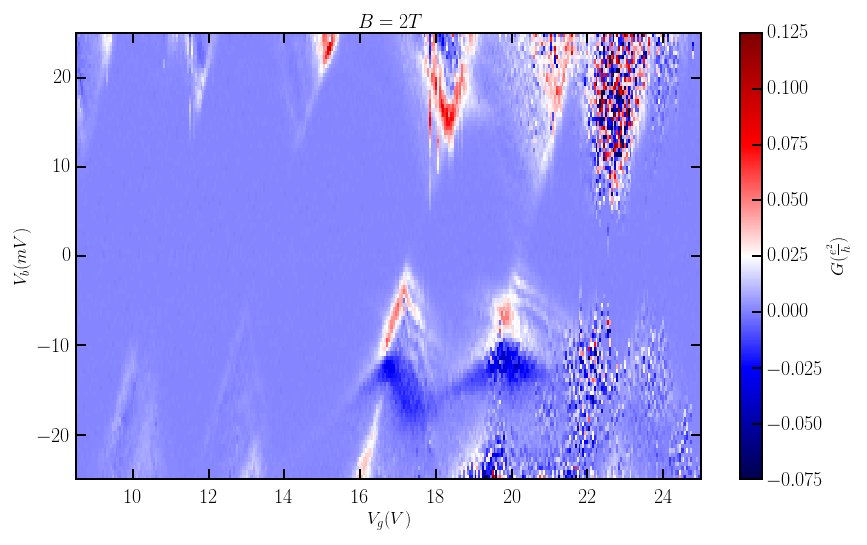

In [61]:
# DIAMONDS AT 2T

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T.pkl')
df = pd.read_pickle(f)

fig, ax = plt.subplots(1,1, figsize = (14,8))
cond = get_dIdV(df, 500e-6)/3.875e-5
limits = lvdt.df_extent(cond)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$V_b (mV)$')
#ax.grid()
ax.set_xlim(8.5, 25)
ax.set_title('$B = 2T$')
cb = plt.colorbar(im)
cb.set_label(r'$G (\frac{e^2}{h})$')

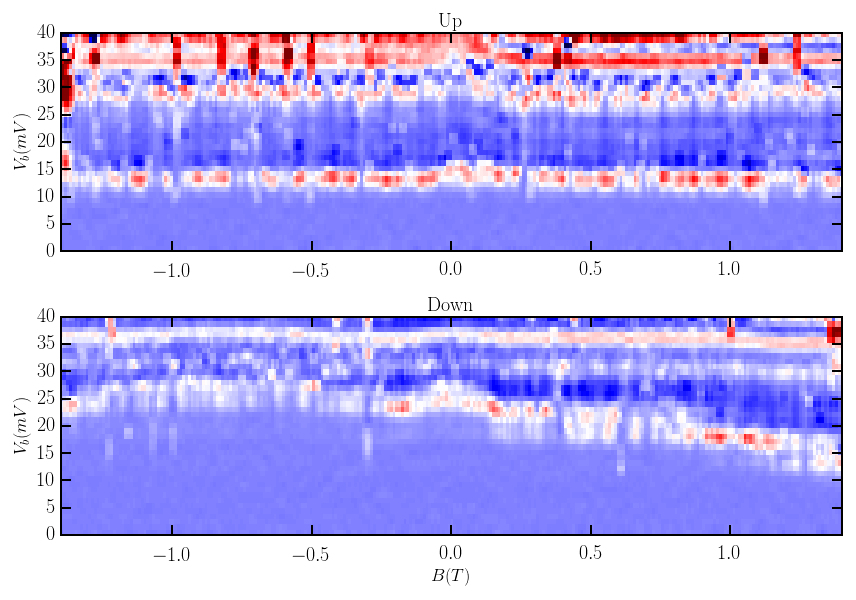

In [62]:
# SWEEP BIAS AND FIELD

f = '4K_vi-bswp_16-17_23_c_10000.0mV.pkl'
df = pd.read_pickle(os.path.join(data_dir,f))

dV = 1e-3
cond = get_dIdV(df,dV)

ind = np.where(np.diff(df.columns)==0)[0]
cuts = np.concatenate(([0],ind,[len(df.columns)-1]), axis=0)

fig, ax = plt.subplots(2,1, figsize=(14,9))

limits = [df.columns[cuts[0]], df.columns[cuts[1]], df.index.min(), df.index.max()]

condup = cond.iloc[:,cuts[0]:cuts[1]]/3.875e-5
im0 = ax[0].imshow(pd.rolling_mean(condup, 3, axis=1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[0].set_ylabel(r'$V_b (mV)$')
ax[0].set_title('Up')
ax[0].set_xlim(-1.4, 1.4)

conddown = cond.iloc[:,cuts[1]:cuts[-1]]/3.875e-5

limits = [df.columns[cuts[-1]], df.columns[cuts[1]], df.index.min(), df.index.max()]
im1 = ax[1].imshow(pd.rolling_mean(conddown[conddown.columns[::-1]], 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_g (V)$')
ax[1].set_ylabel(r'$V_b (mV)$')
ax[1].set_xlabel(r'$B (T)$')
ax[1].set_title('Down')
ax[1].set_xlim(-1.4, 1.4)

fig.subplots_adjust(hspace = 0.3)

### 1/f Noise modeling

In [30]:
def get_data_ps(filename):
    """ returns a pandas array with the 2d data from the binary file
        tagged with relevant information from the header file """
    
    
    df = lvdt.get_data_2d(filename) # get data
    df['Bias'] *= 1000.0
    
    dt = df['dt'].mean()
    M, N = df.ix[:,'i0':].shape
    t = np.arange(0,N)*dt # time series (s)
    freqs = np.fft.fftfreq(N, dt) # frequency (Hz)
    idx = np.argsort(freqs) # sort arrays with this
    freqs = freqs[idx]
    
    # get the white noise spectrum
    white = np.zeros(N)
    i = 0.0
    for s in df[np.abs(df['Bias'])<1e-6].ix[:,'i0':].values:
        white += np.abs(np.fft.fft(s))**2
        i +=1.0
    white = white[idx]/i
    
    # setup dataframe
    cols = ['Bias', 'Iavg']
    cols.extend([f for f in freqs[N/2:]])
    psdf = pd.DataFrame(np.zeros((M,N/2+2)), columns = cols)
    psdf[['Bias','Iavg']] = df[['Bias','Iavg']]
    for j, s in enumerate(df.ix[:,'i0':].values):
        ps = np.abs(np.fft.fft(s))**2
        psdf.iloc[j,2:] = ps[idx][N/2:] - white[N/2:]
    return psdf.groupby(psdf['Bias']).mean()

In [36]:
def noise_model(x, amp, a, b, current):
    return amp*np.power(current, b)/np.power(x, a)

In [37]:
from lmfit import Model, Parameter

model = Model(noise_model, independent_vars=['x'])
params = model.make_params()
params['current'].vary = False
params['amp'].min = 0.0
params['amp'].value = 1.0
params['b'].vary = False
params['b'].value = 2.0
params['b'].min = 0.0
params['a'].vary = False
params['a'].value = 1.0

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#### 1/f Noise in SCF96

In [24]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'
og_dir = '/Volumes/JUPITER/Data/SCF96/q3/'

In [12]:
# load current data and calculate conductance from pkl

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [81]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [85]:
offset = df.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist[:]):
    psdf = get_data_ps(f)

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns
    # params['b'].value = 2.0
    
    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdf.iloc[i,j] = result.params['amp'].value

In [86]:
ampdf.head()

Gate,5.0,5.05,5.1,5.15,5.2,5.25,5.3,5.35,5.4,5.45,...,29.55,29.6,29.65,29.7,29.75,29.8,29.85,29.9,29.95,30.0
Bias,,,,,,,,,,,,,,,,,,,,,
-25.0,8126.196823,4856.468226,9655.610259,9176.291822,20966.476476,7392.861623,6128.598041,4365.124228,5812.918070,4141.564343,...,346.916332,248.140134,222.376253,152.731983,191.360323,183.931183,238.845914,209.811146,298.730070,234.609599
-24.5,3755.689306,3073.713592,6919.184073,5295.668016,11443.671474,6407.572629,14560.912181,13382.803225,12222.375740,2660.624206,...,215.770982,238.806711,249.695033,212.880756,205.859422,205.854237,221.992108,370.871305,227.947782,285.989267
-24.0,4191.407950,9274.999658,3872.339385,6473.286269,7415.142205,6415.183276,8145.009731,4988.471747,5068.825562,1869.430166,...,394.412503,260.463958,201.674124,303.958001,252.891974,231.931453,226.941270,319.625464,225.742983,411.038182
-23.5,8819.148333,6490.152959,7041.278804,10003.769677,30317.027565,10396.782351,3541.224516,5525.533556,2667.890656,2430.584124,...,201.895569,294.247865,323.235269,320.186682,359.800055,227.025786,430.676145,342.657408,216.050071,426.806248
-23.0,10881.144837,5825.079896,8976.463404,4537.251926,4212.716754,7350.005410,4013.016013,16688.750555,5891.728037,1290.196776,...,245.178459,517.989919,311.340810,242.907037,389.299097,393.357018,264.744747,469.729900,364.826799,332.511969


In [87]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))
ampdf.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))

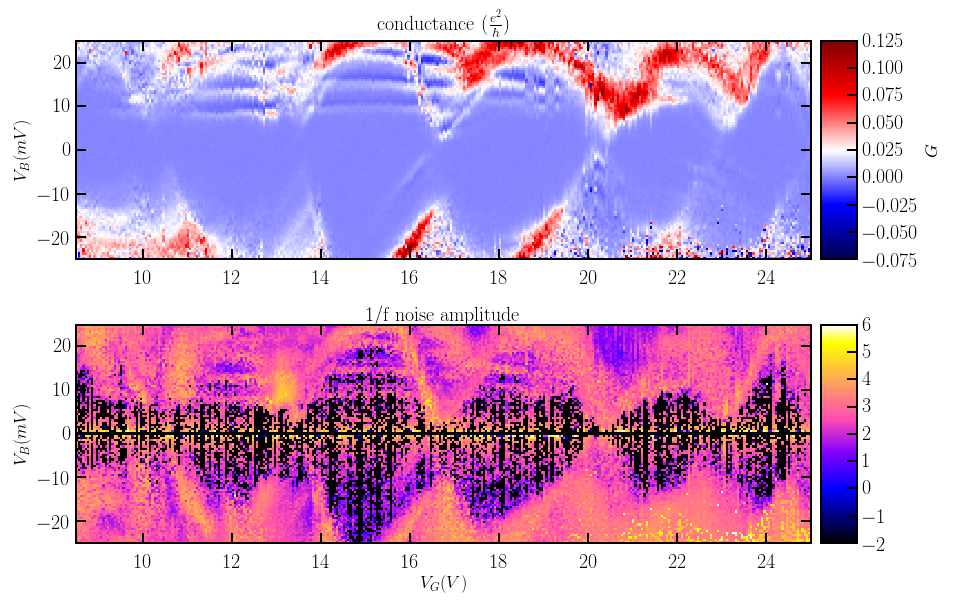

In [139]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdf)

im0 = axes.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(ampdf), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/noise_spectroscopy.png', dpi=300)

In [89]:
f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [90]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_2T_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [91]:
offset = df.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist):
    psdf = get_data_ps(f)

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdf.iloc[i,j] = result.params['amp'].value

In [92]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

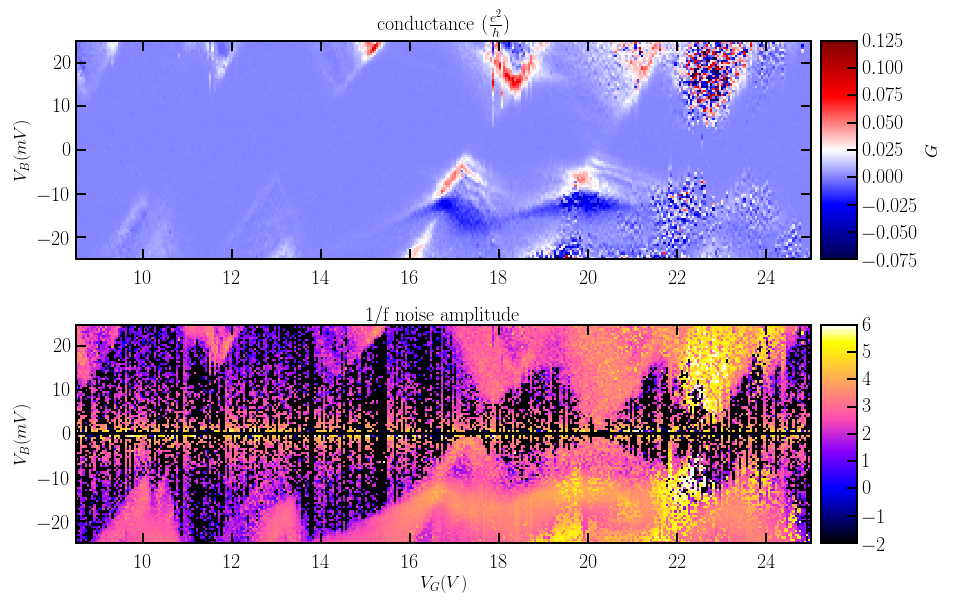

In [93]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdf)

im0 = axes.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(ampdf), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(8.5, 25)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

In [15]:
f = '4K_vi-bswp_16-17_23_c_10000.0mV.pkl'
df = pd.read_pickle(os.path.join(data_dir,f))

dV = 1e-3
cond = get_dIdV(df,dV)

ind = np.where(np.diff(df.columns)==0)[0]
cuts = np.concatenate(([0],ind,[len(df.columns)-1]), axis=0)

In [16]:
field = df.columns.values
filelist = [os.path.join(og_dir, 'vi-bswp_16-17_23_c_{0:.0f}.bin'.format(g*1000)) for g in field]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [17]:
def get_bswp_ps(filename, ends):
    """ returns a pandas array with the 2d data from the binary file
        tagged with relevant information from the header file """
    
    
    df = lvdt.get_data_2d(filename) # get data
    df = df.iloc[ends[0]:ends[1], :]
    df.index = np.arange(0, df.shape[0])
    df['Bias'] *= 1000.0
    
    dt = df['dt'].mean()
    M, N = df.ix[:,'i0':].shape
    t = np.arange(0,N)*dt # time series (s)
    freqs = np.fft.fftfreq(N, dt) # frequency (Hz)
    idx = np.argsort(freqs) # sort arrays with this
    freqs = freqs[idx]
    
    # get the white noise spectrum
    white = np.zeros(N)
    i = 0.0
    for s in df[np.abs(df['Bias'])<1e-6].ix[:,'i0':].values:
        white += np.abs(np.fft.fft(s))**2
        i +=1.0
    white = white[idx]/i
    
    # setup dataframe
    cols = ['Bias', 'Iavg']
    cols.extend([f for f in freqs[N/2:]])
    psdf = pd.DataFrame(np.zeros((M,N/2+2)), columns = cols)
    psdf[['Bias','Iavg']] = df[['Bias','Iavg']]
    for j, s in enumerate(df.ix[:,'i0':].values):
        ps = np.abs(np.fft.fft(s))**2
        psdf.iloc[j,2:] = ps[idx][N/2:] - white[N/2:]
    return psdf.groupby(psdf['Bias']).mean()

In [14]:
offset = df.loc[0.0, :].mean()
ampup = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)
ampdown = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist):
    psdf = get_bswp_ps(f, (0,82))

    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampup.iloc[i,j] = result.params['amp'].value
        
for j, f in enumerate(filelist):
    psdf = get_bswp_ps(f, (82,None))
    
    current = psdf['Iavg'] - offset
    psdf.drop(psdf.columns[[0, 1]], axis=1, inplace=True) # drop the current and f=0 columns

    #A = np.zeros(len(df.index))
    for i, bias in enumerate(df.index):
        params['current'].value = current[bias] # set current
        result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
        ampdown.iloc[i,j] = result.params['amp'].value

NameError: name 'filelist' is not defined

In [98]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampup.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-up.pkl'))
ampdown.to_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-down.pkl'))

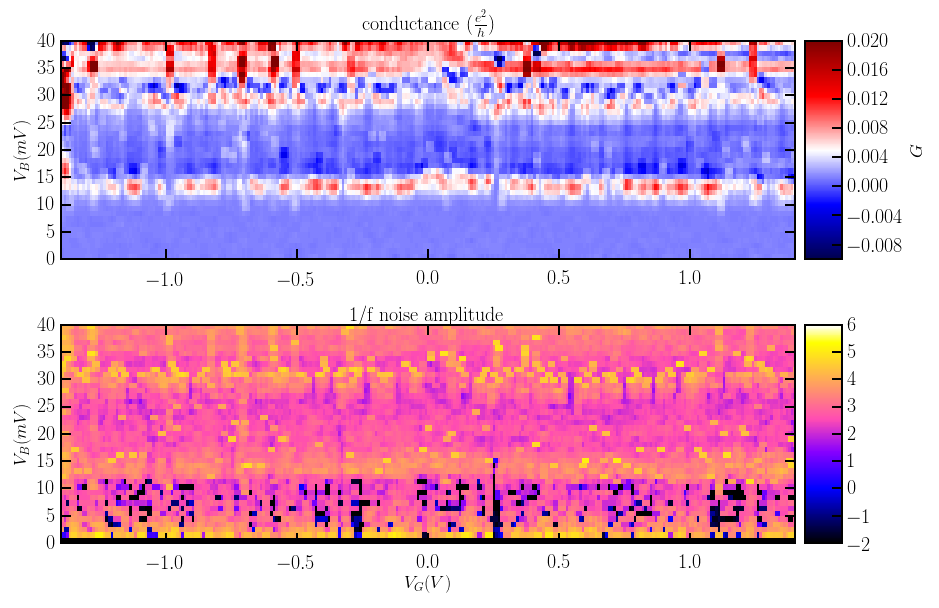

In [99]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampup = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-up.pkl'))

condup = cond.iloc[:,cuts[0]:cuts[1]]/3.875e-5
ampup = ampup.groupby(ampup.columns, axis = 1).mean()

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampup)

im0 = axes.imshow(pd.rolling_mean(condup, 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(pd.rolling_mean(ampup, 3, axis = 1)), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

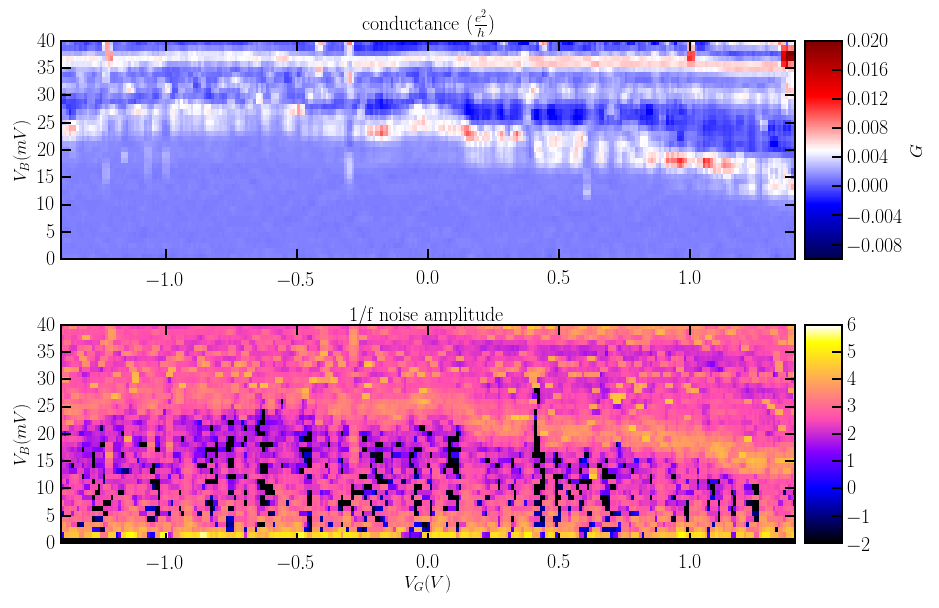

In [100]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_cond.pkl'))
ampdown = pd.read_pickle(os.path.join(data_dir, '4K_vi-bswp_16-17_23_c_noise-amp-down.pkl'))

conddown = cond.iloc[:,cuts[1]:cuts[-1]]/3.875e-5
ampdown = ampdown.groupby(ampdown.columns, axis = 1).mean()

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdown)

im0 = axes.imshow(pd.rolling_mean(conddown[conddown.columns[::-1]], 3, axis = 1), extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.01, vmax = 0.02,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(pd.rolling_mean(ampdown, 3, axis = 1)), extent = limits, 
               cmap = plt.cm.gnuplot2, vmin = -2, vmax = 6, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(-1.4, 1.4)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
# cb1.set_label(r'$\log_{10}(A)$')

#### Time Series Plots

In [27]:
# going to make some time series plots and a slice of the conductance data

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

In [28]:
gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [31]:
f = filelist[320]
print filelist[320]
psdf = get_data_ps(f)
freq = psdf.columns[2:]

/Volumes/JUPITER/Data/SCF96/q3/vi-gate_16-17_23_a_21000.bin


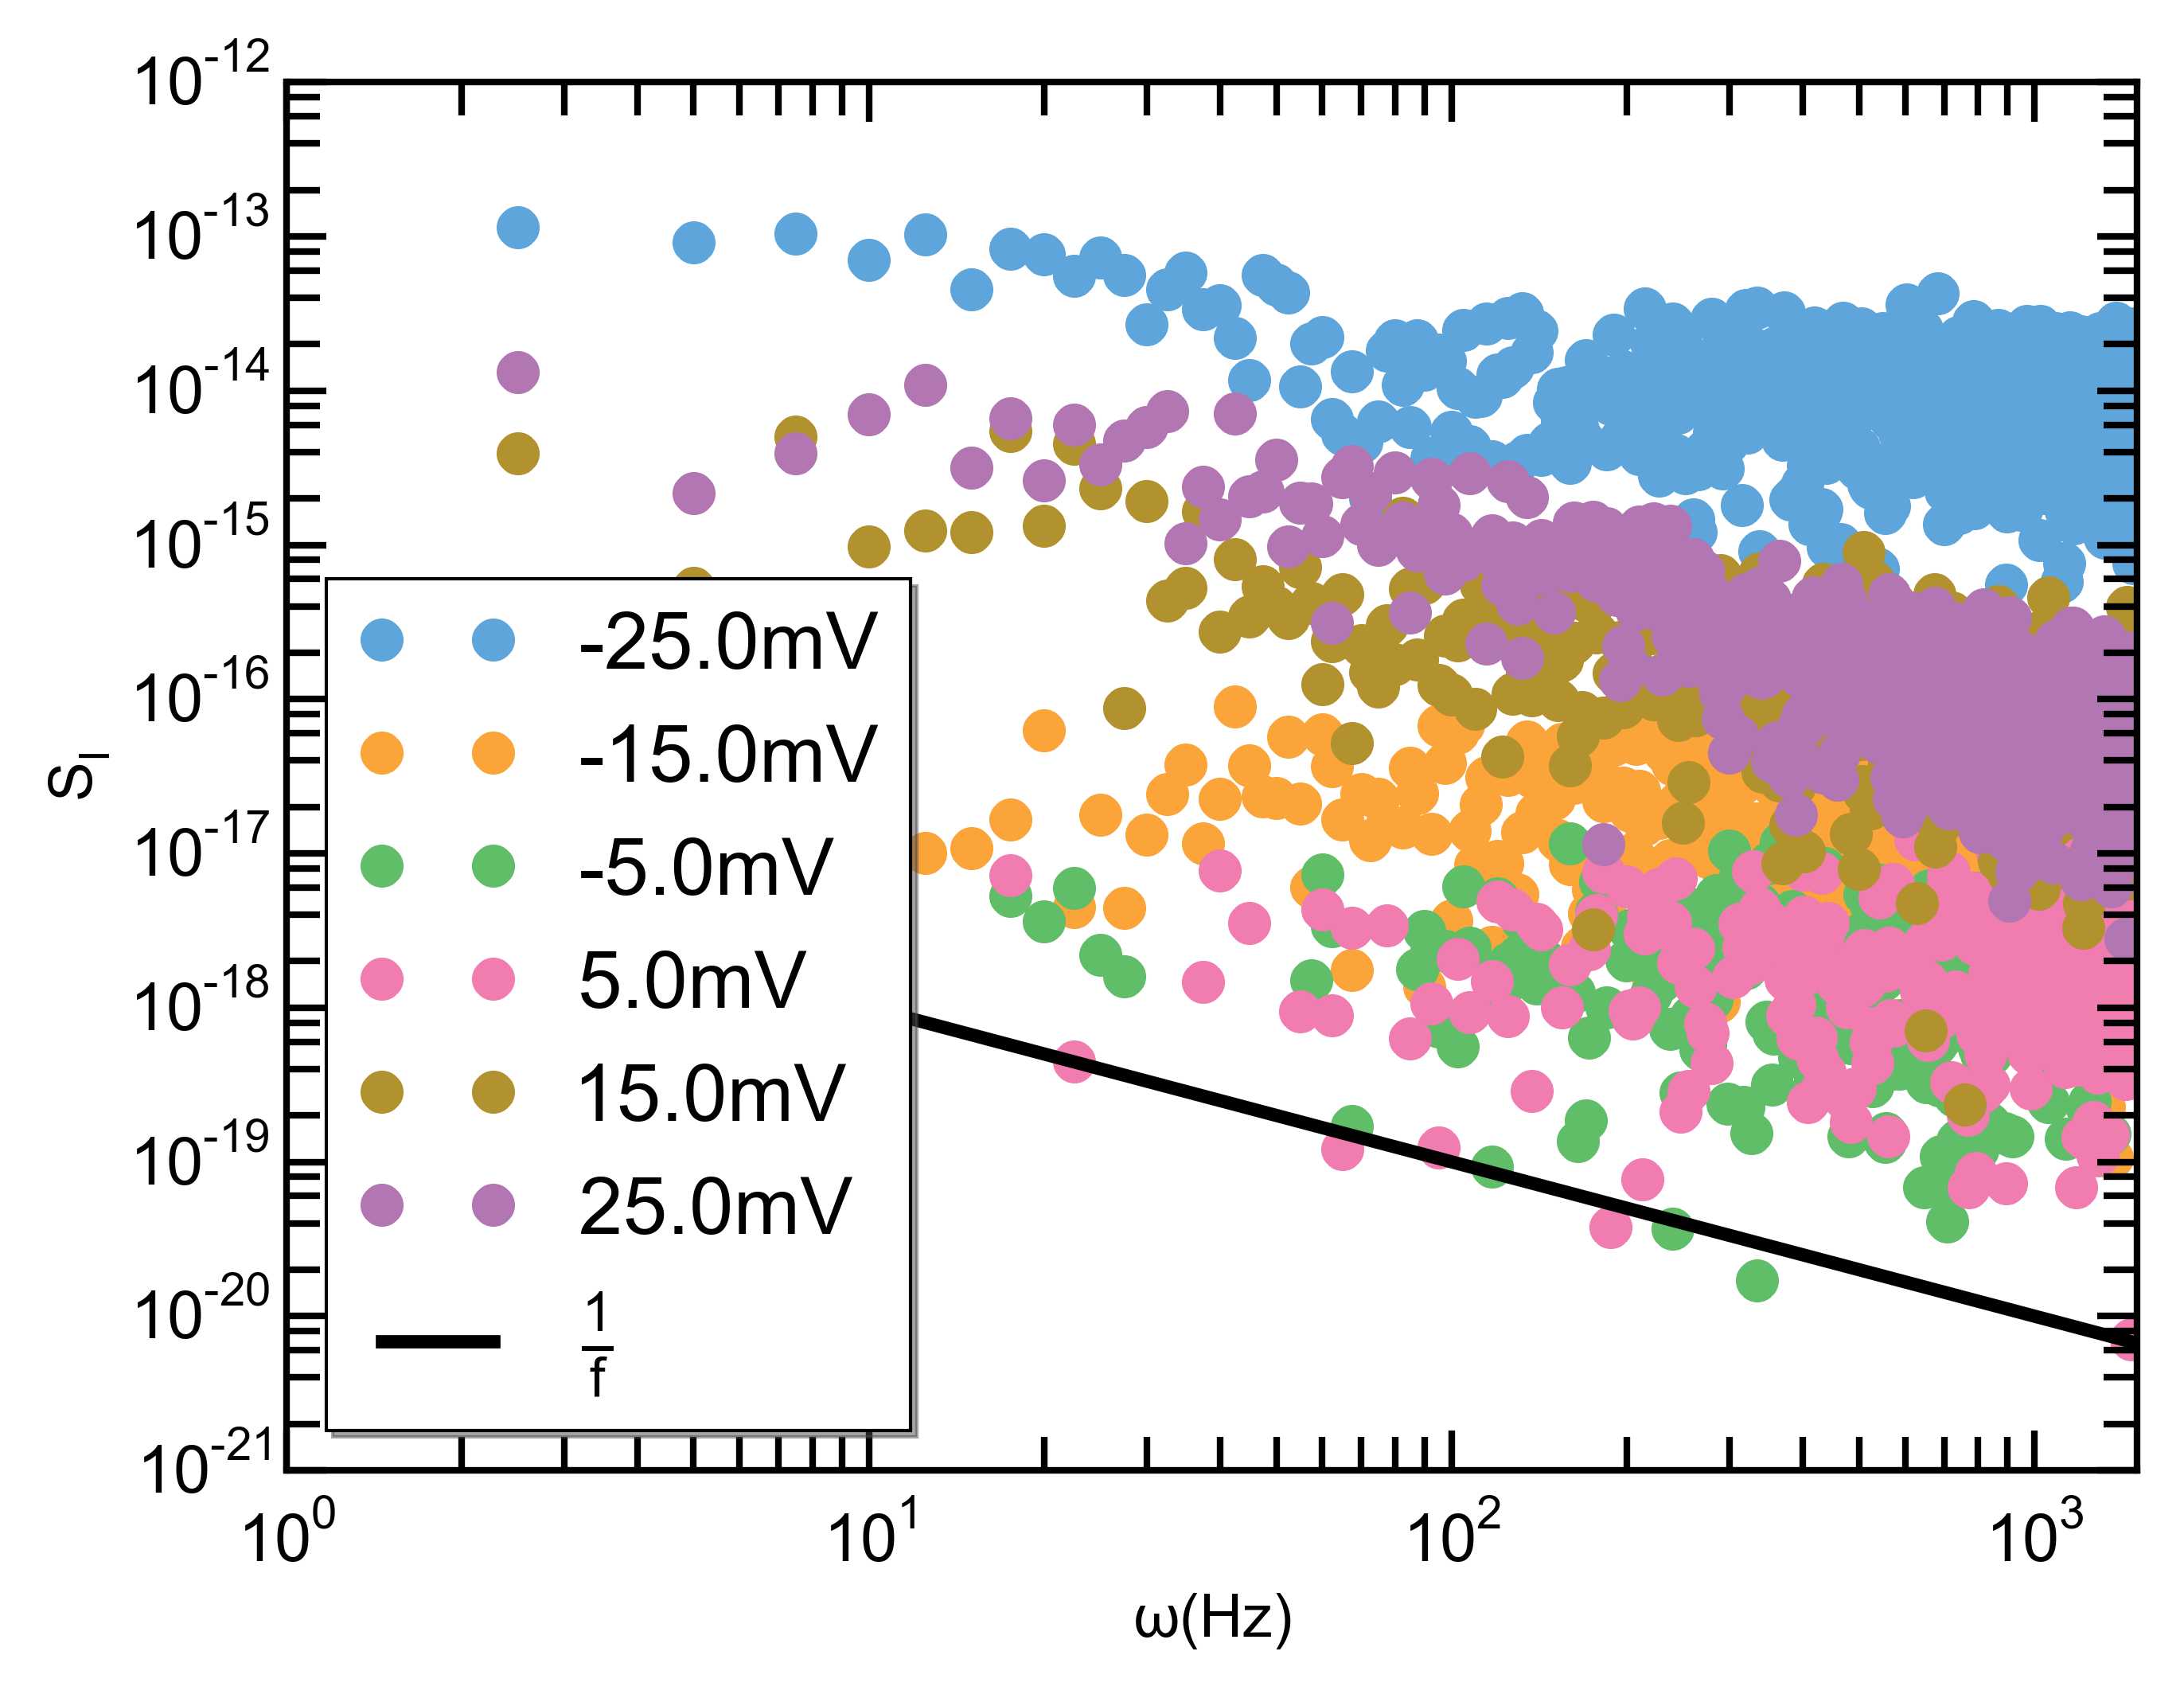

In [33]:
fig, ax = plt.subplots(1,1)

for i in np.linspace(0, 100, 6, dtype = np.int):
    ax.plot(freq, psdf.iloc[i, 2:], '.', label = '{0}mV'.format(psdf.index[i]))
ax.plot(freq, 1e-17/freq.values, c='k', label = r'$\frac{1}{f}$')
ax.set_xscale('log')
ax.set_xlim(None,1500)
ax.set_ylabel(r'$S_I$')
ax.set_yscale('log')
ax.set_xlabel('$\omega (Hz)$')
ax.legend(loc = 3)

fig.savefig('/Users/nik/Dropbox/Talks/DEFENSE/figures/1-f_real_data.png', dpi=300)

#### Check $1/f$, $I^2$ fits

In [38]:
def current_fit(current, b, amp):
    return amp*np.power(current, -b)

In [39]:
model = Model(current_fit, independent_vars=['current'])
params = model.make_params()
params['b'].vary = True
params['b'].min = 0.0
params['b'].max = 10.0
params['b'].value = 2.0
params['amp'].vary = True
params['amp'].value = 1e-30

In [40]:
f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


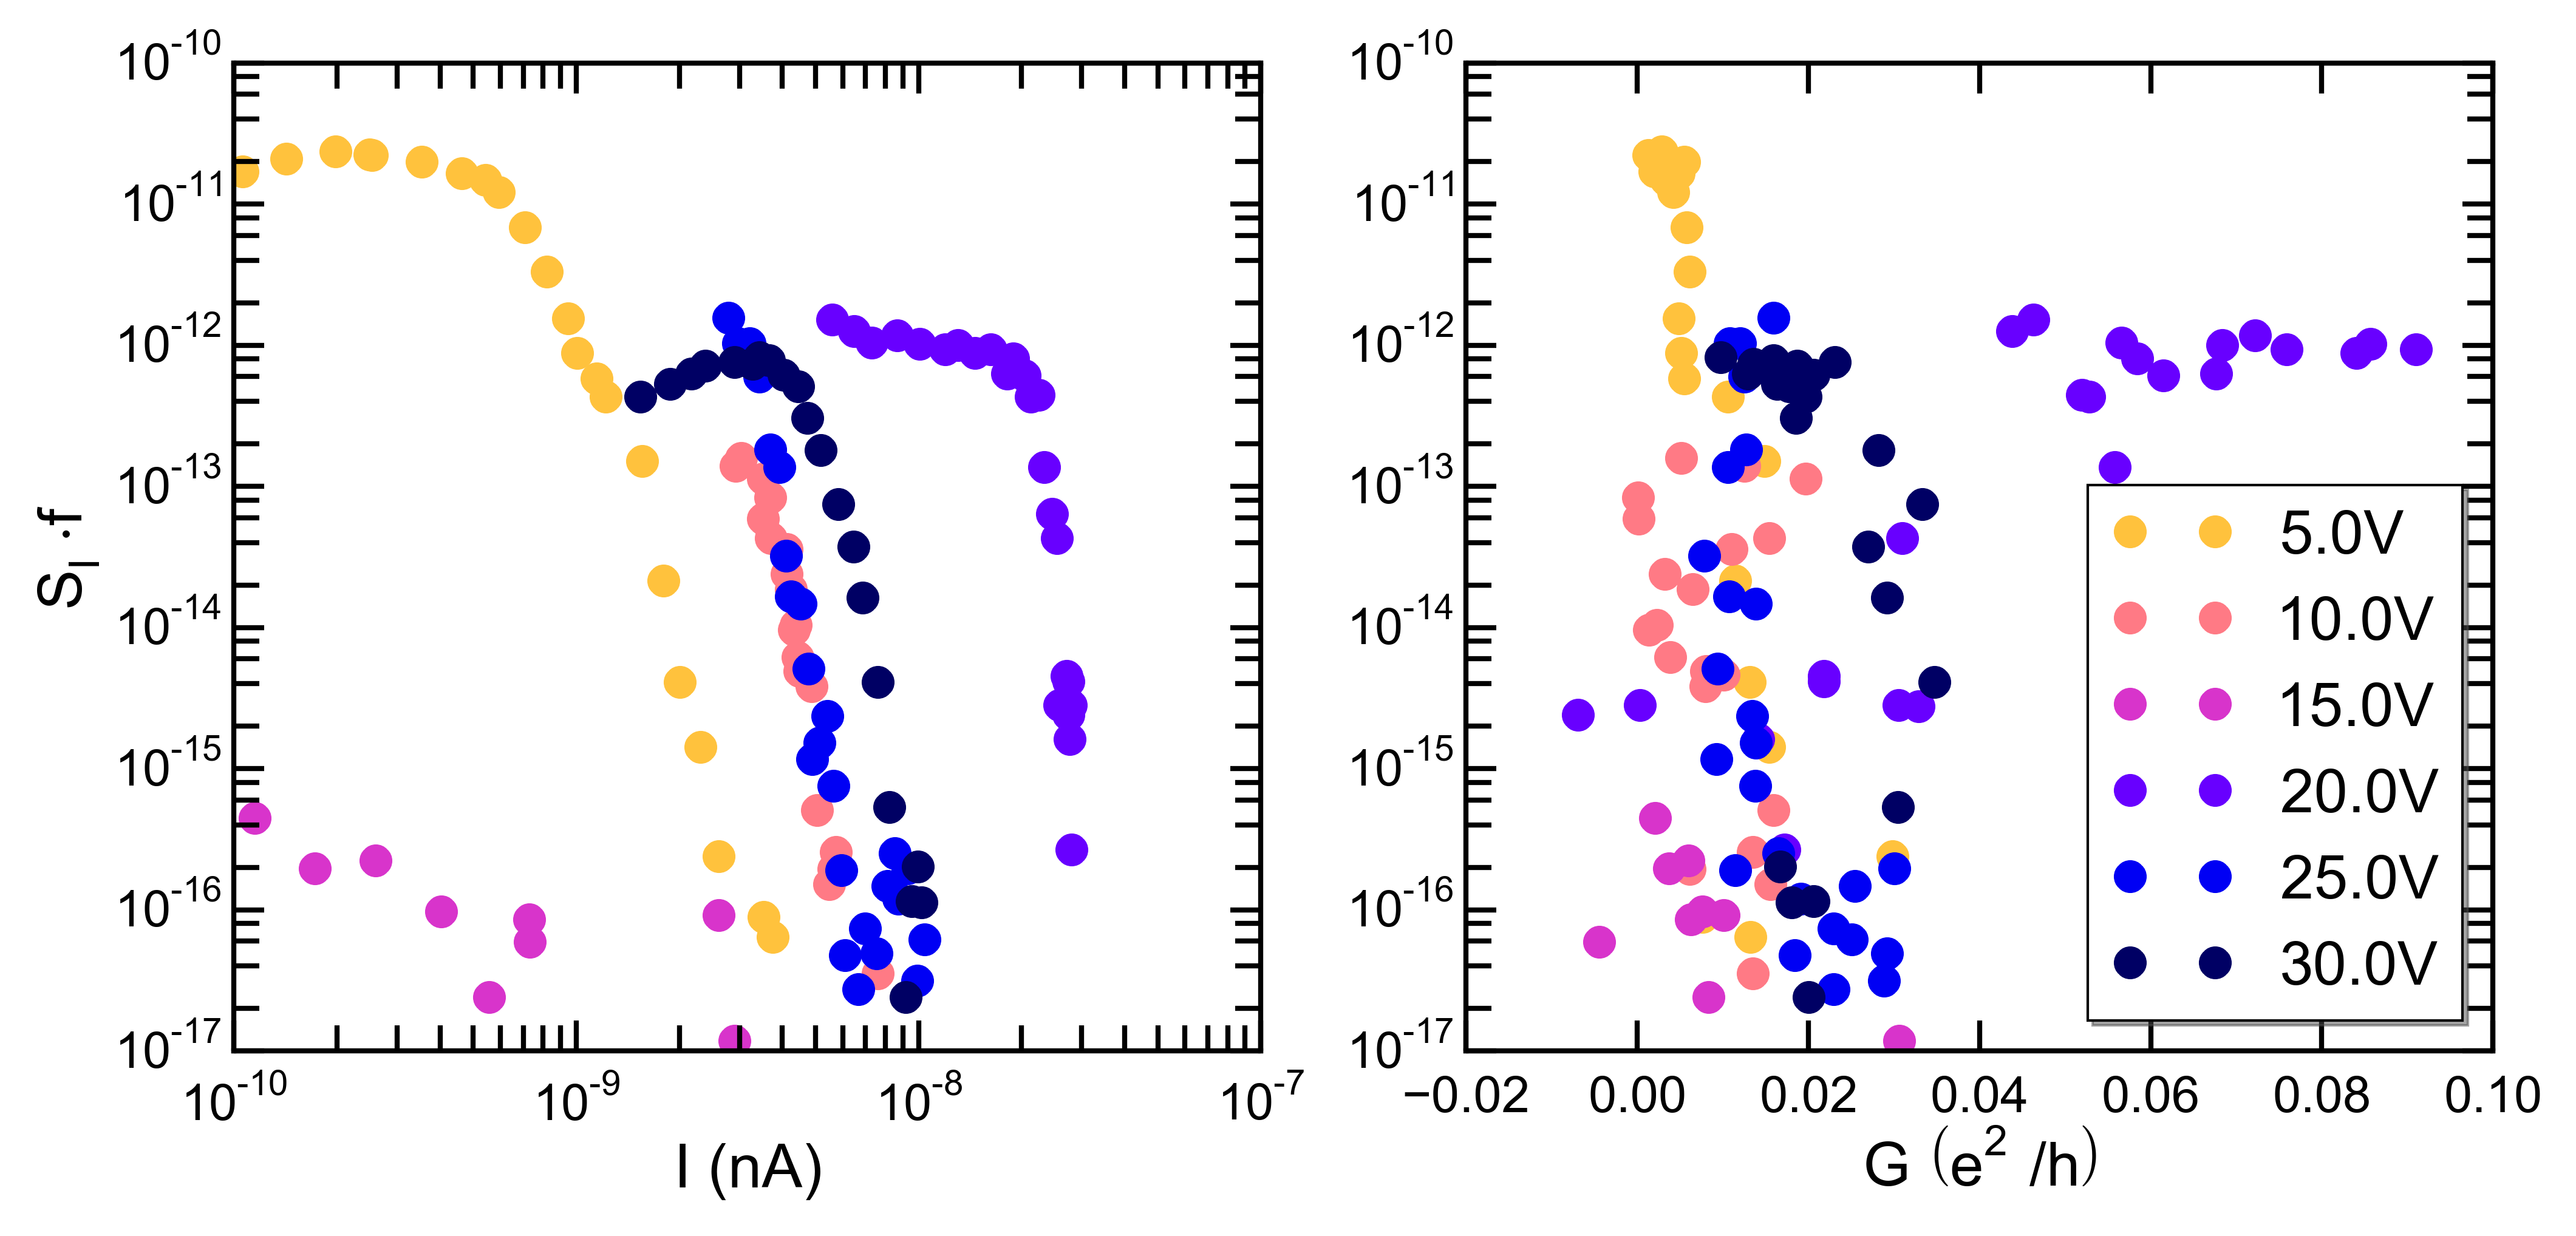

In [45]:
fig, (ax, ax2) = plt.subplots(1,2, sharey=False, figsize = (16,7))
N = 6
color_idx = np.linspace(0.8, 0.1, N)
for m, n in enumerate(np.linspace(0,500,N, dtype=np.int)):
    f = filelist[n]
    psdf = get_data_ps(f)
    freq = psdf.columns[2:]

    #mean(power spectrum * frequency)
    sif = np.zeros(len(psdf.index))
    for index, row in psdf.iterrows(): 
        sif[index] = np.mean(row[2:]*psdf.columns[2:])
    eps = 1e-17
    ind = np.zeros(len(sif), dtype=np.bool)
    for i in range(len(sif)):
        if (psdf['Iavg'].iloc[i]>eps) and (sif[i] > eps):
            ind[i] = True
    l = '{:.1f}V'.format(gate[n])
    ax.plot(psdf['Iavg'].iloc[ind], sif[ind], '.', 
            label = l, color = plt.cm.gnuplot2(color_idx[m]))
    ax2.plot(cond.iloc[ind,n], sif[ind], '.', 
             label = l, color = plt.cm.gnuplot2(color_idx[m]))
    
#     result = model.fit(sif[ind], params, current=psdf['Iavg'].iloc[ind])
#     print result.params['amp'].value, result.params['b']
#     ax.plot(psdf['Iavg'].iloc[ind], current_fit(psdf['Iavg'].iloc[ind], **result.params), 'r.')
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('I (nA)', fontsize = 24)
ax.set_ylabel('$S_I\cdot f$', fontsize = 24)
#ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'G $\left(e^2/h\right)$', fontsize = 24)
ax2.legend(loc='lower right')
# ax.set_ylabel('$S_I\cdot f$')
# ax.set_xlim(1e-9, 1e-7)

fig.savefig('/Users/nik/Dropbox/Talks/DEFENSE/figures/noise_amplitude_scaling.pdf')

In [16]:
data_dir = '/Volumes/JUPITER/Data/fm_dots/SCF96/'
og_dir = '/Volumes/JUPITER/Data/SCF96/q3/'

In [25]:
# load current data and calculate conductance from pkl

f = os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T.pkl')
df = pd.read_pickle(f)
cond = get_dIdV(df, 500e-6)/3.875e-5

gate = df.columns.values
filelist = [os.path.join(og_dir, 'vi-gate_16-17_23_a_2T_{0:.0f}.bin'.format(g*1000)) for g in gate]
print np.all([os.path.isfile(f) for f in filelist]) # if this is false there is going to be trouble

True


In [26]:
offset = df.loc[0.0, :].mean()
ampdf = pd.DataFrame(np.zeros(df.shape), index = df.index, columns = df.columns)

for j, f in enumerate(filelist[:]):
    psdf = get_data_ps(f)
    current = psdf['Iavg'] - offset
    
    for index, row in psdf.iterrows():
        ampdf.loc[index,gate[j]] = np.mean(row[2:]*psdf.columns[2:])
#     for i, bias in enumerate(df.index):
#         params['current'].value = current[bias] # set current
#         result = model.fit(psdf.ix[bias,:], params, x=psdf.columns)
#         ampdf.iloc[i,j] = result.params['amp'].value

In [27]:
cond.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf.to_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

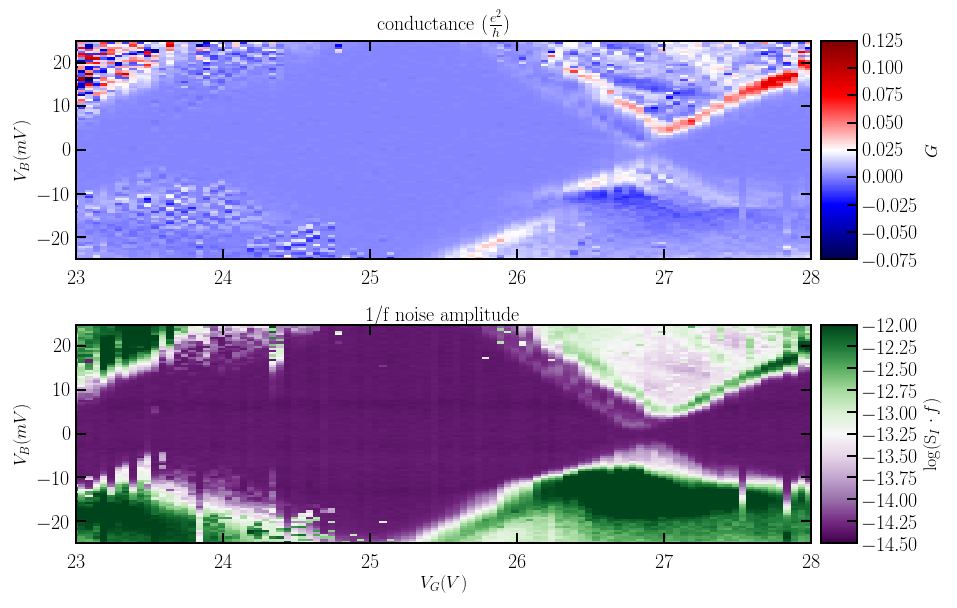

In [35]:
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_cond.pkl'))
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_2T_noise-amp.pkl'))

fig = plt.figure(figsize = (14,9))
gs = gridspec.GridSpec(2, 2, height_ratios=(1, 1), width_ratios=(20, 1))
gs.update(wspace=0.025, hspace=0.3)
axes = fig.add_subplot(gs[0,0])
limits = lvdt.df_extent(ampdf)

im0 = axes.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.075, vmax = 0.125, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
#ax[0].set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title(r'conductance ($\frac{e^2}{h}$)')
axes.set_xlim(23, 28)
cax = fig.add_subplot(gs[0,1])
cb0 = plt.colorbar(im0, cax = cax)
cb0.set_label(r'$G$')

axes = fig.add_subplot(gs[1,0])
im1 = axes.imshow(np.log10(ampdf-ampdf.min().min()), extent = limits, 
               cmap = plt.cm.PRGn, vmin = -14.5, vmax = -12, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
axes.set_xlabel(r'$V_G (V)$')
axes.set_ylabel(r'$V_B (mV)$')
axes.set_title('1/f noise amplitude')
axes.set_xlim(23, 28)
cax = fig.add_subplot(gs[1,1])
cb1 = plt.colorbar(im1, cax = cax)
cb1.set_label(r'\log($S_I\cdot f)$')

# fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/noise_no_field.pdf')

In [107]:
ampdf.min().min()

1.239573632989521e-15

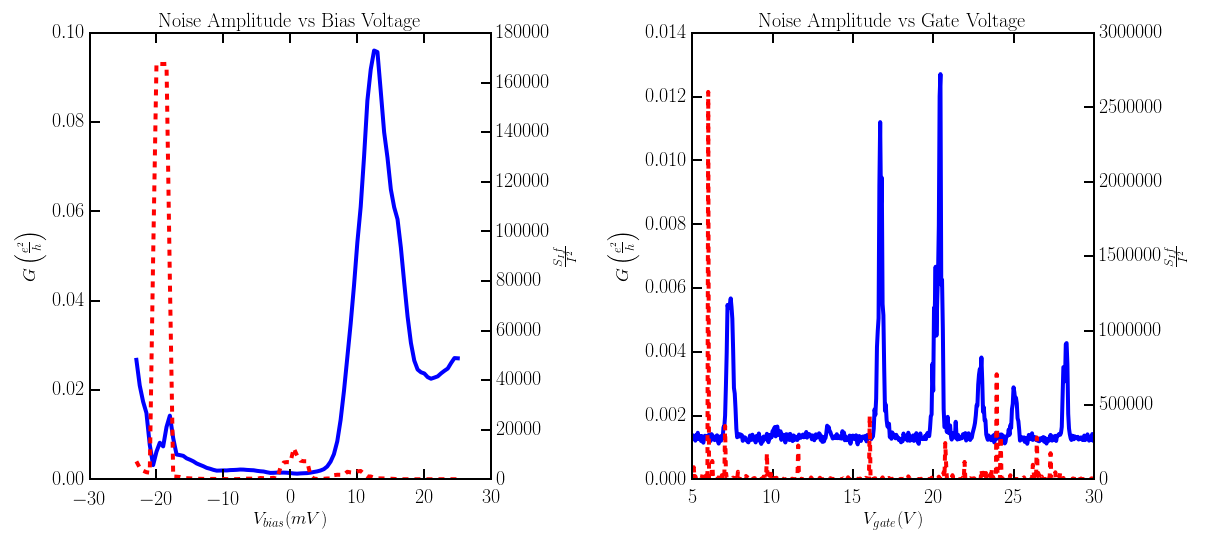

In [133]:
# ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))

ampdf = pd.rolling_mean(ampdf, 5)
cond = pd.rolling_mean(cond, 5)

fig, (ax, ax3) = plt.subplots(1,2, figsize = (18, 8))
ax.plot(cond.index, cond[21.0])
ax.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax.set_xlabel('$V_{bias} (mV)$')
ax2 = ax.twinx()
ax2.set_ylabel(r'$\frac{S_I f}{I^2}$')
ax2.plot(ampdf.index, ampdf[21.0], 'r--')
# ax2.set_ylim(1,6)
ax.set_title('Noise Amplitude vs Bias Voltage')

c = cond.iloc[54:59,:].mean()
a = ampdf.iloc[54:59,:].mean()

ax3.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax3.set_xlabel('$V_{gate} (V)$')
ax4 = ax3.twinx()
ax4.set_ylabel(r'$\frac{S_I f}{I^2}$')
ax4.plot(a.index, a, 'r--')
# ax4.set_ylim(1,6)
ax3.plot(c.index, c)
ax3.set_title('Noise Amplitude vs Gate Voltage')

fig.subplots_adjust(wspace=.5)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/noise_sweeps.png', dpi=300)

#### Simulated Spectrum

In [123]:
def one_over_f(f, N):
    return N/f

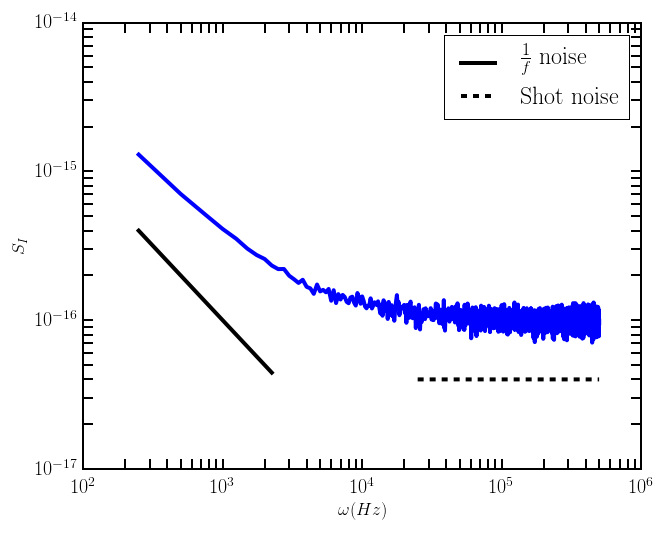

In [132]:
fig, ax = plt.subplots(1,1)

freq = np.linspace(0, 500000, 2000)
noise = one_over_f(freq, 3e-13)+1e-16+1e-17*np.random.randn(*freq.shape)
sn = 4e-17*np.ones(len(freq))
ax.plot(freq, noise)
ax.set_xscale('log')
#ax.set_xlim(None,1500)
ax.set_ylabel(r'$S_I$')
ax.set_yscale('log')
ax.set_xlabel('$\omega (Hz)$')
ax.plot(freq[:10], 1e-13/freq[:10], c='k', label = r'$\frac{1}{f}$ noise')
ax.plot(freq[100:], sn[100:], 'k--', label = 'Shot noise')
# ax.set_title('Types of Noise')
ax.legend(fontsize = 24)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/noise_types.png', dpi=300)

In [ ]:
ampdf = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_noise-amp.pkl'))
cond = pd.read_pickle(os.path.join(data_dir, '4K_vi-gate_16-17_23_a_cond.pkl'))

c = cond.iloc[54:59,:].mean()
a = ampdf.iloc[54:59,:].mean()

fig, ax = plt.subplots(1,1)
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel('$V_G (V)$')
ax2 = ax.twinx()
ax2.set_ylabel(r'$log_{10}(\frac{S_I f}{I^2})$')
ax2.plot(a.index, a, 'r--')
ax.plot(c.index, c)